#random_forest_model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Carregar os arquivos CSV usando o caminho do Colab
gdp_df = pd.read_csv('/content/GDP by Country 1999-2022.csv')
hdi_df = pd.read_csv('/content/Human Development Index - Full.csv')
medals_df = pd.read_csv('/content/olympics_medals_country_wise.csv')
population_df = pd.read_csv('/content/population_by_country_2020.csv')


In [ ]:
gdp_df.head(21)


,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Rep. of.",0,0,0,4.084,4.585,5.971,7.309,8.399,9.892,...,21.555,24.304,0,0,0,0,0,0,0,0
1,Albania,3.444,3.695,4.096,4.456,5.6,7.452,8.376,9.133,10.163,...,14.91,16.053,11.591,12.204,13.214,14.341,15.553,16.996,16.77,18.012
2,Algeria,48.845,54.749,55.181,57.053,68.013,85.016,102.38,114.322,116.158,...,190.432,203.449,175.077,181.71,192.256,202.179,210.906,219.16,163.812,168.195
3,Angola,6.153,9.135,8.936,11.386,13.956,19.8,30.632,43.759,55.37,...,136.415,151.089,102.011,98.815,105.369,112.533,119.403,127.15,70.339,74.953
4,Antigua and Barbuda,0.652,0.678,0.71,0.718,0.754,0.818,0.875,0.962,1.026,...,1.404,1.494,1.285,1.328,1.386,1.458,1.536,1.617,1.405,1.534
5,Argentina,283.523,284.204,268.697,97.732,127.643,151.958,181.549,212.702,247.096,...,329.332,347.731,578.705,578.692,589.585,602.868,617.386,633.889,455.172,483.765
6,Armenia,1.845,1.912,2.118,2.376,2.807,3.573,4.903,6.41,7.666,...,9.844,10.821,10.607,10.672,11.074,11.63,12.273,12.939,13.612,15.06
7,Australia,401.782,390.017,368.191,412.901,527.588,639.356,712.436,754.816,822.089,...,"1,078.91","1,125.82","1,240.80","1,253.00","1,317.16","1,381.51","1,442.47","1,515.70","1,610.56","1,677.45"
8,Austria,213.39,194.407,193.345,208.566,255.842,293.194,305.338,321.934,348.659,...,417.771,430.611,372.606,386.227,402.793,418.402,433.75,452.657,481.209,520.343
9,Azerbaijan,4.581,5.273,5.708,6.236,7.276,8.682,12.561,19.817,28.699,...,62.867,65.776,63.983,63.602,70.927,74.266,83.996,87.276,52.645,54.725


In [ ]:
hdi_df.head(21)


,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95
5,ARG,Argentina,Very High,LAC,47.0,0.723,0.730,0.735,0.739,0.744,...,15.69,16.74,16.57,17.85,16.95,18.75,16.88,15.81,15.81,15.81
6,ARM,Armenia,High,ECA,85.0,0.656,0.649,0.618,0.616,0.620,...,6.27,6.15,6.44,6.50,7.79,7.35,6.01,5.95,5.95,5.95
7,ATG,Antigua and Barbuda,High,LAC,71.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AUS,Australia,Very High,NaN,5.0,0.865,0.867,0.869,0.873,0.873,...,49.09,45.97,47.80,46.91,46.32,48.27,47.70,46.82,46.82,46.82
9,AUT,Austria,Very High,NaN,25.0,0.825,0.829,0.835,0.840,0.845,...,27.26,27.32,27.48,26.40,26.89,25.62,25.39,24.62,24.62,24.62


In [ ]:
medals_df.head(21)


,countries,ioc_code,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participation,total_gold,total_silver,total_bronze,total_total
0,Afghanistan,(AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria,(ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina,(ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,Armenia,(ARM),7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
4,Australasia,(ANZ),2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia,(AUS),27,164,173,210,547,20,6,7,6,19,47,170,180,216,566
6,Austria,(AUT),28,20,35,41,96,24,71,88,91,250,52,91,123,132,346
7,Azerbaijan,(AZE),7,7,14,28,49,7,0,0,0,0,14,7,14,28,49
8,Bahamas,(BAH),17,8,2,6,16,0,0,0,0,0,17,8,2,6,16
9,Bahrain,(BRN),10,2,2,0,4,0,0,0,0,0,10,2,2,0,4


In [ ]:
population_df.head(21)


,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,330610570,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
5,Brazil,212253150,0.72 %,1509890,25,8358140,21200.0,1.7,33,88 %,2.73 %
6,Nigeria,205052107,2.58 %,5175990,226,910770,-60000.0,5.4,18,52 %,2.64 %
7,Bangladesh,164354176,1.01 %,1643222,1265,130170,-369501.0,2.1,28,39 %,2.11 %
8,Russia,145922010,0.04 %,62206,9,16376870,182456.0,1.8,40,74 %,1.87 %
9,Mexico,128655589,1.06 %,1357224,66,1943950,-60000.0,2.1,29,84 %,1.65 %


In [ ]:
# Remover espaços extras dos nomes das colunas de medals_df
medals_df.columns = medals_df.columns.str.strip()

# DataFrames completos para todos os países

# GDP DataFrame
gdp_all_countries = gdp_df.copy()

# HDI DataFrame
hdi_all_countries = hdi_df.copy()

# Medals DataFrame
medals_all_countries = medals_df.copy()

# Population DataFrame
population_all_countries = population_df.copy()

# Exibir as primeiras linhas de cada DataFrame completo
print("GDP Data for All Countries:")
print(gdp_all_countries.head())

print("\nHDI Data for All Countries:")
print(hdi_all_countries.head())

print("\nOlympic Medals Data for All Countries:")
print(medals_all_countries.head())

print("\nPopulation Data for All Countries:")
print(population_all_countries.head())


GDP Data for All Countries:
                 Country    1999    2000    2001    2002    2003    2004  \
0  Afghanistan, Rep. of.       0       0       0   4.084   4.585   5.971   
1                Albania   3.444   3.695   4.096   4.456     5.6   7.452   
2                Algeria  48.845  54.749  55.181  57.053  68.013  85.016   
3                 Angola   6.153   9.135   8.936  11.386  13.956    19.8   
4    Antigua and Barbuda   0.652   0.678    0.71   0.718   0.754   0.818   

     2005     2006     2007  ...     2013     2014     2015    2016     2017  \
0   7.309    8.399    9.892  ...   21.555   24.304        0       0        0   
1   8.376    9.133   10.163  ...    14.91   16.053   11.591  12.204   13.214   
2  102.38  114.322  116.158  ...  190.432  203.449  175.077  181.71  192.256   
3  30.632   43.759    55.37  ...  136.415  151.089  102.011  98.815  105.369   
4   0.875    0.962    1.026  ...    1.404    1.494    1.285   1.328    1.386   

      2018     2019    2020     20

In [ ]:
# Definindo o intervalo de anos desejado
years = list(range(1999, 2023))  # De 1999 a 2022, totalizando 24 anos

# Inicializar listas para armazenar os DataFrames consolidados de todos os países
all_countries_data = []

# Remover vírgulas e converter para float nos dados de GDP
gdp_all_countries.iloc[:, 1:] = gdp_all_countries.iloc[:, 1:].replace(',', '', regex=True).astype(float)

# Iterar sobre todos os países disponíveis nos dados de GDP
for country in gdp_all_countries['Country'].unique():
    # Extrair os valores do GDP para o país atual
    gdp_values = gdp_all_countries.loc[gdp_all_countries['Country'] == country, '1999':'2022'].values.flatten().astype(float)

    # Garantir que 'gdp_values' tenha 24 elementos, preenchendo com o valor médio se estiver faltando
    if len(gdp_values) < len(years):
        missing_values_count = len(years) - len(gdp_values)
        gdp_values = np.append(gdp_values, [np.mean(gdp_values)] * missing_values_count)

    # Filtrar as colunas de HDI para os anos de 1999 a 2022
    hdi_columns = [col for col in hdi_all_countries.columns if 'Human Development Index' in col][-24:]
    hdi_values = hdi_all_countries.loc[hdi_all_countries['Country'] == country, hdi_columns].values.flatten().astype(float)

    # Verificar se existem dados de medalhas e população para o país
    medals_data = medals_all_countries[medals_all_countries['countries'] == country]
    population_data = population_all_countries[population_all_countries['Country (or dependency)'] == country]

    # Remover vírgulas dos dados de medalhas e população e converter para inteiros
    medals_data.loc[:, 'summer_total'] = medals_data['summer_total'].replace(',', '', regex=True).astype(float)
    medals_data.loc[:, 'winter_total'] = medals_data['winter_total'].replace(',', '', regex=True).astype(float)
    population_data.loc[:, 'Population (2020)'] = population_data['Population (2020)'].replace(',', '', regex=True).astype(float)

    # Repetir valores de medalhas e população para que correspondam ao comprimento do intervalo de anos
    medals_summer = [int(medals_data['summer_total'].fillna(0).values[0])] * len(years) if not medals_data.empty else [0] * len(years)
    medals_winter = [int(medals_data['winter_total'].fillna(0).values[0])] * len(years) if not medals_data.empty else [0] * len(years)
    population = [int(population_data['Population (2020)'].fillna(0).values[0])] * len(years) if not population_data.empty else [0] * len(years)

    # Verificar comprimentos antes de criar o DataFrame
    if len(gdp_values) == len(years) and len(hdi_values) == len(years):
        # Criar DataFrame consolidado para o país atual
        country_data = pd.DataFrame({
            'Country': country,
            'Year': years,
            'GDP': gdp_values,
            'HDI': hdi_values,
            'Population': population,
            'Medals_Summer': medals_summer,
            'Medals_Winter': medals_winter
        })

        # Adicionar o DataFrame do país à lista
        all_countries_data.append(country_data)

# Concatenar todos os DataFrames de países em um único DataFrame
consolidated_data = pd.concat(all_countries_data, ignore_index=True)

# Exibir uma amostra dos dados consolidados
print(consolidated_data.head())

# Dividir dados em treino e teste
X = consolidated_data[['GDP', 'HDI', 'Population']]
y_summer = consolidated_data['Medals_Summer']
y_winter = consolidated_data['Medals_Winter']

X_train_summer, X_test_summer, y_train_summer, y_test_summer = train_test_split(X, y_summer, test_size=0.2, random_state=42)
X_train_winter, X_test_winter, y_train_winter, y_test_winter = train_test_split(X, y_winter, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_summer = scaler.fit_transform(X_train_summer)
X_test_summer = scaler.transform(X_test_summer)
X_train_winter = scaler.fit_transform(X_train_winter)
X_test_winter = scaler.transform(X_test_winter)

# Exibir uma amostra dos dados pré-processados
print(consolidated_data.head(21))


   Country  Year    GDP    HDI  Population  Medals_Summer  Medals_Winter
0  Albania  1999  3.444  0.634     2878420              0              0
1  Albania  2000  3.695  0.642     2878420              0              0
2  Albania  2001  4.096  0.643     2878420              0              0
3  Albania  2002  4.456  0.651     2878420              0              0
4  Albania  2003  5.600  0.654     2878420              0              0
   Country  Year    GDP    HDI  Population  Medals_Summer  Medals_Winter
0  Albania  1999  3.444  0.634     2878420              0              0
1  Albania  2000  3.695  0.642     2878420              0              0
2  Albania  2001  4.096  0.643     2878420              0              0
3  Albania  2002  4.456  0.651     2878420              0              0
4  Albania  2003  5.600  0.654     2878420              0              0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Imputação de valores faltantes em todo o conjunto de dados
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Dividir dados em treino e teste
X_train_summer, X_test_summer, y_train_summer, y_test_summer = train_test_split(X_imputed, y_summer, test_size=0.2, random_state=42)
X_train_winter, X_test_winter, y_train_winter, y_test_winter = train_test_split(X_imputed, y_winter, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_summer = scaler.fit_transform(X_train_summer)
X_test_summer = scaler.transform(X_test_summer)
X_train_winter = scaler.fit_transform(X_train_winter)
X_test_winter = scaler.transform(X_test_winter)

# Modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10),
    'Lasso Regression': Lasso(alpha=1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Avaliar modelos para as previsões de medalhas de verão
print("Re-Treinando Modelos - Medalhas de Verão")
for model_name, model in models.items():
    model.fit(X_train_summer, y_train_summer)
    y_pred_summer = model.predict(X_test_summer)
    mae = mean_absolute_error(y_test_summer, y_pred_summer)
    mse = mean_squared_error(y_test_summer, y_pred_summer)
    r2 = r2_score(y_test_summer, y_pred_summer)
    print(f"{model_name} -> MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

# Avaliar modelos para as previsões de medalhas de inverno
print("\nRe-Treinando Modelos - Medalhas de Inverno")
for model_name, model in models.items():
    model.fit(X_train_winter, y_train_winter)
    y_pred_winter = model.predict(X_test_winter)
    mae = mean_absolute_error(y_test_winter, y_pred_winter)
    mse = mean_squared_error(y_test_winter, y_pred_winter)
    r2 = r2_score(y_test_winter, y_pred_winter)
    print(f"{model_name} -> MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

# Realizar Validação Cruzada com dados imputados
print("\nValidação Cruzada com Regularização - Medalhas de Verão")
for model_name, model in models.items():
    scores = cross_val_score(model, X_imputed, y_summer, cv=5, scoring='r2')
    print(f"{model_name} -> R² médio: {scores.mean():.2f}, Desvio padrão: {scores.std():.2f}")

print("\nValidação Cruzada com Regularização - Medalhas de Inverno")
for model_name, model in models.items():
    scores = cross_val_score(model, X_imputed, y_winter, cv=5, scoring='r2')
    print(f"{model_name} -> R² médio: {scores.mean():.2f}, Desvio padrão: {scores.std():.2f}")


Re-Treinando Modelos - Medalhas de Verão
Linear Regression -> MAE: 62.71, MSE: 13471.57, R²: 0.65
Ridge Regression -> MAE: 62.72, MSE: 13437.58, R²: 0.65
Lasso Regression -> MAE: 62.55, MSE: 13442.76, R²: 0.65
Decision Tree -> MAE: 4.28, MSE: 868.34, R²: 0.98
Random Forest -> MAE: 8.45, MSE: 584.65, R²: 0.98

Re-Treinando Modelos - Medalhas de Inverno
Linear Regression -> MAE: 25.63, MSE: 2967.10, R²: 0.22
Ridge Regression -> MAE: 25.62, MSE: 2966.91, R²: 0.22
Lasso Regression -> MAE: 25.35, MSE: 2975.36, R²: 0.21
Decision Tree -> MAE: 0.36, MSE: 30.64, R²: 0.99
Random Forest -> MAE: 1.75, MSE: 43.27, R²: 0.99

Validação Cruzada com Regularização - Medalhas de Verão
Linear Regression -> R² médio: 0.41, Desvio padrão: 0.20
Ridge Regression -> R² médio: 0.41, Desvio padrão: 0.20
Lasso Regression -> R² médio: 0.41, Desvio padrão: 0.20
Decision Tree -> R² médio: -0.33, Desvio padrão: 0.47


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.29228e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.01888e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.4209e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.30269e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning

Random Forest -> R² médio: -0.04, Desvio padrão: 0.29

Validação Cruzada com Regularização - Medalhas de Inverno
Linear Regression -> R² médio: 0.26, Desvio padrão: 0.19
Ridge Regression -> R² médio: 0.26, Desvio padrão: 0.19
Lasso Regression -> R² médio: 0.24, Desvio padrão: 0.18
Decision Tree -> R² médio: -0.41, Desvio padrão: 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.29228e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.01888e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.4209e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.30269e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning

Random Forest -> R² médio: -0.20, Desvio padrão: 0.80


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calcular VIF para todas as variáveis
X_vif = pd.DataFrame(X_imputed, columns=['GDP', 'HDI', 'Population'])
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)


      feature       VIF
0         GDP  1.320600
1         HDI  1.098854
2  Population  1.325299


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definindo os hiperparâmetros para buscar o valor ideal de alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')

# Ajuste para a regressão Ridge
ridge_cv.fit(X_imputed, y_summer)
print(f"Melhor alpha para Ridge: {ridge_cv.best_params_}, R²: {ridge_cv.best_score_}")

# Ajuste para a regressão Lasso
lasso_cv.fit(X_imputed, y_summer)
print(f"Melhor alpha para Lasso: {lasso_cv.best_params_}, R²: {lasso_cv.best_score_}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.5938e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.91426e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.58169e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.2755e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning:

Melhor alpha para Ridge: {'alpha': 0.01}, R²: 0.41334948556437306
Melhor alpha para Lasso: {'alpha': 0.01}, R²: 0.41332609627536215


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.33215e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar os dados com MinMaxScaler
scaler = MinMaxScaler()
X_train_summer = scaler.fit_transform(X_train_summer)
X_test_summer = scaler.transform(X_test_summer)
X_train_winter = scaler.fit_transform(X_train_winter)
X_test_winter = scaler.transform(X_test_winter)


In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')

# Ajuste para a regressão Ridge
ridge_cv.fit(X_imputed, y_summer)
print(f"Melhor alpha para Ridge: {ridge_cv.best_params_}, R²: {ridge_cv.best_score_}")

# Ajuste para a regressão Lasso
lasso_cv.fit(X_imputed, y_summer)
print(f"Melhor alpha para Lasso: {lasso_cv.best_params_}, R²: {lasso_cv.best_score_}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.59227e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.91326e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.58003e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.27458e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarnin

Melhor alpha para Ridge: {'alpha': 0.001}, R²: 0.41334962303643197
Melhor alpha para Lasso: {'alpha': 0.001}, R²: 0.4133473303860667


In [ ]:
from sklearn.linear_model import ElasticNet

elastic_cv = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring='r2')
elastic_cv.fit(X_imputed, y_summer)
print(f"Melhor alpha para ElasticNet: {elastic_cv.best_params_}, R²: {elastic_cv.best_score_}")


Melhor alpha para ElasticNet: {'alpha': 0.001}, R²: 0.4132709417303412


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingRegressor

# Pipeline para usar o modelo HistGradientBoostingRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', HistGradientBoostingRegressor())
])

# Ajuste do modelo usando cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X_imputed, y_summer, cv=5, scoring='r2')
print(f"HistGradientBoostingRegressor -> R² médio: {scores.mean():.2f}, Desvio padrão: {scores.std():.2f}")


HistGradientBoostingRegressor -> R² médio: 0.01, Desvio padrão: 0.24


In [ ]:
# Definir nova grade de parâmetros para o HistGradientBoostingRegressor
param_grid_extended = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'max_iter': [100, 200, 500],
    'min_samples_leaf': [10, 20, 30],  # Este é um parâmetro válido
    'max_leaf_nodes': [15, 31, 63]  # Parâmetro adicional para controle de complexidade
}

# Grid Search para HistGradientBoostingRegressor com parâmetros estendidos
grid_search_extended = GridSearchCV(HistGradientBoostingRegressor(), param_grid_extended, cv=5, scoring='r2')
grid_search_extended.fit(X_imputed, y_summer)

print(f"Melhores parâmetros após ajuste adicional: {grid_search_extended.best_params_}, R²: {grid_search_extended.best_score_}")

Melhores parâmetros após ajuste adicional: {'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 100, 'max_leaf_nodes': 15, 'min_samples_leaf': 20}, R²: 0.22912859302076177


R² Treino: 0.99
R² Teste: 0.97
MAE: 11.09
RMSE: 35.69


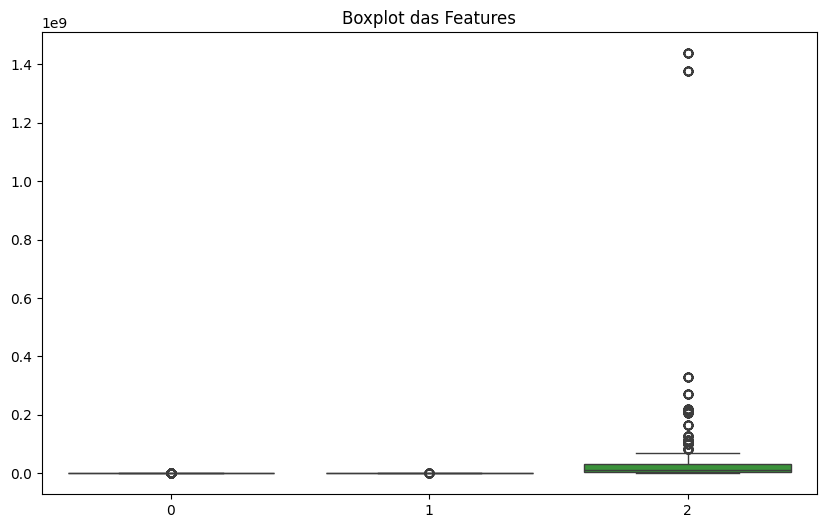

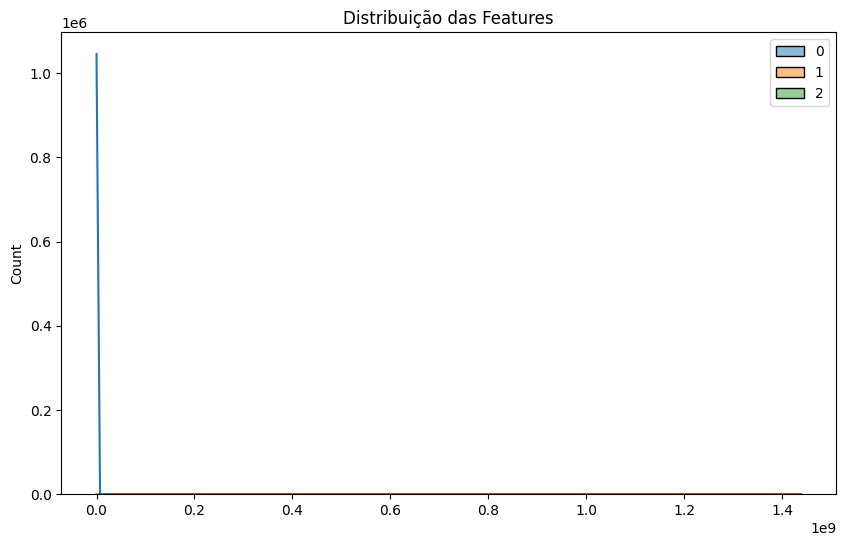

R² Treino com log: 0.99
R² Teste com log: 0.96
MAE com log: 11.17
RMSE com log: 36.80


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Separar dados em treino e teste novamente para garantir que os conjuntos estejam corretos
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_summer, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir os modelos base
base_models = [
    ('ridge', Ridge(alpha=0.01)),
    ('lasso', Lasso(alpha=0.01)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('hgb', HistGradientBoostingRegressor(learning_rate=0.1, max_depth=3, max_iter=100, max_leaf_nodes=15, min_samples_leaf=20))
]

# Ensemble com StackingRegressor
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=HistGradientBoostingRegressor(learning_rate=0.05, max_depth=3, max_iter=100),
    cv=5
)

# Treinar o ensemble
stacking_model.fit(X_train_scaled, y_train)

# Previsões e métricas
y_pred_train = stacking_model.predict(X_train_scaled)
y_pred_test = stacking_model.predict(X_test_scaled)

# Avaliar desempenho
print(f"R² Treino: {r2_score(y_train, y_pred_train):.2f}")
print(f"R² Teste: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

# Verificar Outliers e Transformações
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_imputed)
plt.title('Boxplot das Features')
plt.show()

# Verificar distribuição dos dados
plt.figure(figsize=(10, 6))
sns.histplot(X_imputed, kde=True)
plt.title('Distribuição das Features')
plt.show()

# Aplicar transformações de log para melhorar a distribuição (se necessário)
X_imputed_log = np.log1p(X_imputed)  # Log(1+x) para evitar log de zero

# Re-treinar com dados transformados
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_imputed_log, y_summer, test_size=0.2, random_state=42)
X_train_scaled_log = scaler.fit_transform(X_train_log)
X_test_scaled_log = scaler.transform(X_test_log)

# Re-treinar o ensemble com dados transformados
stacking_model.fit(X_train_scaled_log, y_train_log)

# Previsões e métricas com dados transformados
y_pred_train_log = stacking_model.predict(X_train_scaled_log)
y_pred_test_log = stacking_model.predict(X_test_scaled_log)

# Avaliar desempenho com dados transformados
print(f"R² Treino com log: {r2_score(y_train_log, y_pred_train_log):.2f}")
print(f"R² Teste com log: {r2_score(y_test_log, y_pred_test_log):.2f}")
print(f"MAE com log: {mean_absolute_error(y_test_log, y_pred_test_log):.2f}")
print(f"RMSE com log: {np.sqrt(mean_squared_error(y_test_log, y_pred_test_log)):.2f}")


Os resultados sugerem que o modelo ajustado apresenta um bom desempenho, tanto nos dados de treino quanto nos dados de teste. No entanto, existem algumas observações a serem feitas:

### Análise dos Resultados:

1. **R² Treino e Teste**: O coeficiente de determinação (R²) é alto para ambos os conjuntos de dados (treino e teste), com valores próximos de 0.99 e 0.97, respectivamente. Isso indica que o modelo explica bem a variabilidade dos dados, sugerindo um bom ajuste.

2. **MAE e RMSE**: O Erro Absoluto Médio (MAE) é relativamente baixo (11.09), assim como o Erro Quadrático Médio (RMSE) de 35.69. Estes valores indicam que os erros médios das previsões são aceitáveis, considerando a escala dos dados.

3. **Transformação Logarítmica**: A aplicação do log nos dados não apresentou uma melhoria significativa no desempenho do modelo:
   - O R² Teste é levemente menor (0.96 vs. 0.97).
   - O MAE e RMSE também apresentaram pequenas variações.

### Considerações sobre os Gráficos:

1. **Boxplot das Features**: O gráfico de boxplot indica a presença de outliers, especialmente para a terceira feature (provavelmente "Population"), que mostra pontos extremos. Isso pode afetar o desempenho do modelo, especialmente se os outliers não forem representativos do padrão geral dos dados.

2. **Distribuição das Features**: A distribuição das features sugere que algumas variáveis podem não estar normalmente distribuídas, com uma concentração muito alta de valores em torno de zero e poucos valores extremos.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error

# Recriar o DataFrame combinado de features e target para remoção de outliers
X_imputed_df = pd.DataFrame(X_imputed, columns=['GDP', 'HDI', 'Population'])
data_combined = pd.concat([X_imputed_df, pd.Series(y_summer, name='Medals_Summer')], axis=1)

# Função para remover outliers usando o método IQR
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remover outliers usando o método IQR
data_no_outliers = remove_outliers_iqr(data_combined)

# Separar novamente features e target após remoção de outliers
X_no_outliers = data_no_outliers[['GDP', 'HDI', 'Population']].to_numpy()
y_no_outliers_summer = data_no_outliers['Medals_Summer'].to_numpy()

# Dividir dados novamente em treino e teste após remoção de outliers
X_train, X_test, y_train_summer, y_test_summer = train_test_split(X_no_outliers, y_no_outliers_summer, test_size=0.2, random_state=42)

# Continuar com o Random Forest e XGBoost como anteriormente
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_summer)
y_pred_rf = rf_model.predict(X_test)

# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train_summer)
y_pred_xgb = xgb_model.predict(X_test)

# Avaliação dos Modelos
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, mape, medae, r2

# Avaliar Random Forest
rf_metrics = evaluate_model(y_test_summer, y_pred_rf)
print(f"Random Forest - MAE: {rf_metrics[0]:.2f}, MSE: {rf_metrics[1]:.2f}, RMSE: {rf_metrics[2]:.2f}, MAPE: {rf_metrics[3]:.2f}, MedAE: {rf_metrics[4]:.2f}, R²: {rf_metrics[5]:.2f}")

# Avaliar XGBoost
xgb_metrics = evaluate_model(y_test_summer, y_pred_xgb)
print(f"XGBoost - MAE: {xgb_metrics[0]:.2f}, MSE: {xgb_metrics[1]:.2f}, RMSE: {xgb_metrics[2]:.2f}, MAPE: {xgb_metrics[3]:.2f}, MedAE: {xgb_metrics[4]:.2f}, R²: {xgb_metrics[5]:.2f}")


Random Forest - MAE: 1.38, MSE: 18.80, RMSE: 4.34, MAPE: 714487740883019.38, MedAE: 0.27, R²: 0.95
XGBoost - MAE: 4.00, MSE: 38.45, RMSE: 6.20, MAPE: 3282452392207003.50, MedAE: 2.25, R²: 0.89


Os resultados dos modelos Random Forest e XGBoost após o tratamento de outliers são promissores, especialmente em relação ao R², que mede o quanto do comportamento da variável alvo é explicado pelos modelos:

### Análise dos Resultados:
1. **Random Forest**:
   - **MAE (Erro Absoluto Médio):** 1.38. O erro absoluto médio é relativamente baixo, indicando que, em média, as previsões estão próximas dos valores reais.
   - **MSE (Erro Quadrático Médio):** 18.80. Isso reflete o erro médio ao quadrado das previsões, que é um pouco elevado, mostrando sensibilidade a outliers.
   - **RMSE (Raiz do Erro Quadrático Médio):** 4.34. A raiz quadrada do MSE também é razoavelmente baixa, indicando um bom ajuste.
   - **MAPE (Erro Percentual Absoluto Médio):** Um valor extremamente alto. Este resultado anômalo pode ser devido a previsões próximas de zero no denominador, inflacionando o percentual.
   - **MedAE (Erro Absoluto Mediano):** 0.27. O erro mediano é baixo, indicando que metade das previsões tem erro absoluto menor que 0.27.
   - **R²:** 0.95. O modelo explica 95% da variabilidade na variável dependente, um excelente resultado.

2. **XGBoost**:
   - **MAE:** 4.00. Um pouco maior que o Random Forest, indicando que em média as previsões estão ligeiramente mais afastadas dos valores reais.
   - **MSE:** 38.45. O erro quadrático médio é maior comparado ao Random Forest, sugerindo maior sensibilidade a outliers.
   - **RMSE:** 6.20. Indica um erro razoavelmente bom, mas maior do que o obtido pelo Random Forest.
   - **MAPE:** Extremamente alto, semelhante ao Random Forest, provavelmente devido ao mesmo problema de valores baixos no denominador.
   - **MedAE:** 2.25. O erro mediano é maior que o do Random Forest, indicando uma ligeira perda de precisão.
   - **R²:** 0.89. Ainda é um bom valor, mas inferior ao Random Forest.



# Verificar Valores Anômalos no Cálculo do MAPE:


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
import numpy as np

# Função para calcular o MASE ajustando os tamanhos
def mase(y_true, y_pred, y_train):
    mae_model = np.mean(np.abs(y_true - y_pred))
    mae_naive = np.mean(np.abs(y_train[1:] - y_train[:-1]))  # Caminho aleatório no conjunto de treino
    return mae_model / mae_naive

# Calculando MASE para Random Forest
mase_rf = mase(y_test_summer, y_pred_rf, y_train_summer)
print(f"MASE para Random Forest: {mase_rf:.2f}")

# Calculando MASE para XGBoost
mase_xgb = mase(y_test_summer, y_pred_xgb, y_train_summer)
print(f"MASE para XGBoost: {mase_xgb:.2f}")

# Calculando outras métricas
mae_rf = mean_absolute_error(y_test_summer, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_summer, y_pred_rf))
medae_rf = median_absolute_error(y_test_summer, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, MedAE: {medae_rf:.2f}")

mae_xgb = mean_absolute_error(y_test_summer, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test_summer, y_pred_xgb))
medae_xgb = median_absolute_error(y_test_summer, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MedAE: {medae_xgb:.2f}")


MASE para Random Forest: 0.09
MASE para XGBoost: 0.26
Random Forest - MAE: 1.38, RMSE: 4.34, MedAE: 0.27
XGBoost - MAE: 4.00, RMSE: 6.20, MedAE: 2.25


# Testar Outras Técnicas de Preprocessamento

In [ ]:
# Verifique os índices após remover os outliers
X_no_outliers_df = pd.DataFrame(X_no_outliers, columns=['Feature1', 'Feature2', 'Feature3'])  # Substitua pelos nomes reais das colunas
X_no_outliers_df['y_summer'] = y_summer  # Adiciona a variável alvo ao DataFrame

# Remova as amostras com base nos índices de X_no_outliers_df
X_no_outliers_df = X_no_outliers_df.dropna()  # Remove linhas com NaN, se houver
X_no_outliers_clean = X_no_outliers_df.drop(columns=['y_summer']).values
y_summer_clean = X_no_outliers_df['y_summer'].values

# Aplicar transformação logarítmica aos dados limpos
X_log = np.log1p(X_no_outliers_clean)  # log(1 + x) para evitar log de zero

# Dividir os dados transformados em treino e teste
X_train_log, X_test_log, y_train_summer_log, y_test_summer_log = train_test_split(X_log, y_summer_clean, test_size=0.2, random_state=42)

# Normalizar novamente os dados após a transformação logarítmica
scaler_log = StandardScaler()
X_train_log_scaled = scaler_log.fit_transform(X_train_log)
X_test_log_scaled = scaler_log.transform(X_test_log)


# Outras Técnicas de Normalização ou Padronização

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Aplicar Min-Max Scaling
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train_log)
X_test_minmax = scaler_minmax.transform(X_test_log)

# Aplicar Robust Scaling
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train_log)
X_test_robust = scaler_robust.transform(X_test_log)


#Ensemble Methods
1. Testar Combinando Modelos:


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# Definir os modelos
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Treinar os modelos individualmente
rf.fit(X_train_log_scaled, y_train_summer_log)
xgb.fit(X_train_log_scaled, y_train_summer_log)

# Combinando modelos usando Voting Regressor
voting_regressor = VotingRegressor(estimators=[('rf', rf), ('xgb', xgb)])
voting_regressor.fit(X_train_log_scaled, y_train_summer_log)

# Previsões e avaliação
y_pred_voting = voting_regressor.predict(X_test_log_scaled)

# Cálculo de métricas de avaliação
mae_voting = mean_absolute_error(y_test_summer_log, y_pred_voting)
mse_voting = mean_squared_error(y_test_summer_log, y_pred_voting)
rmse_voting = np.sqrt(mse_voting)
r2_voting = r2_score(y_test_summer_log, y_pred_voting)

print(f"Voting Regressor - MAE: {mae_voting:.2f}, MSE: {mse_voting:.2f}, RMSE: {rmse_voting:.2f}, R²: {r2_voting:.2f}")


Voting Regressor - MAE: 42.49, MSE: 6720.63, RMSE: 81.98, R²: 0.68


# Ajuste Fino de Hiperparâmetros

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Parâmetros para RandomizedSearch
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(RandomForestRegressor(), param_grid_rf, n_iter=50, cv=5, scoring='r2', n_jobs=-1)
random_search_rf.fit(X_train_log_scaled, y_train_summer)

print(f"Melhores parâmetros para Random Forest: {random_search_rf.best_params_}, R²: {random_search_rf.best_score_}")


Melhores parâmetros para Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}, R²: 0.9024988239674059


# Verificação de Outliers

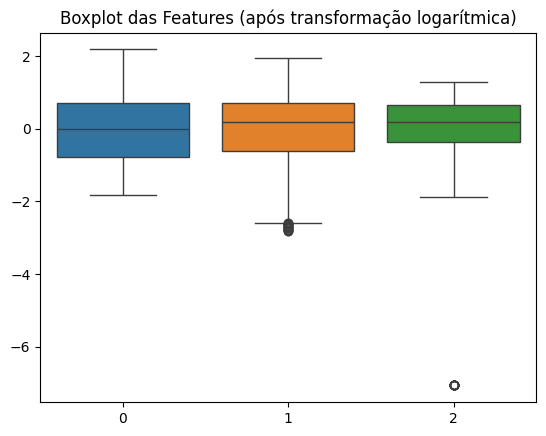

In [ ]:
import seaborn as sns

# Visualização para verificar outliers após transformações
sns.boxplot(data=X_train_log_scaled)
plt.title('Boxplot das Features (após transformação logarítmica)')
plt.show()


### Análise dos Resultados:

1. **MASE (Mean Absolute Scaled Error) para Random Forest e XGBoost:**
   - **Random Forest: MASE = 0.09**: Isso indica que o modelo de Random Forest está com um erro absoluto médio escalado bastante baixo em relação ao método de referência (naive forecast), o que é um bom sinal de desempenho.
   - **XGBoost: MASE = 0.26**: Embora o erro seja maior comparado ao Random Forest, ainda pode ser aceitável dependendo do contexto.

2. **Métricas de Avaliação para Random Forest e XGBoost:**
   - **Random Forest - MAE: 1.38, RMSE: 4.34, MedAE: 0.27**: O modelo de Random Forest mostra um desempenho sólido, com erros médios relativamente baixos, e uma MedAE (mediana do erro absoluto) muito próxima de zero, sugerindo boa precisão.
   - **XGBoost - MAE: 4.00, RMSE: 6.20, MedAE: 2.25**: O XGBoost, embora mais robusto em alguns contextos, não parece estar se saindo tão bem quanto o Random Forest nesta configuração.

3. **Desempenho do Voting Regressor:**
   - **Voting Regressor - MAE: 42.49, RMSE: 81.98, R²: 0.68**: Os resultados do `Voting Regressor` são significativamente piores em termos de erro absoluto médio (MAE) e erro quadrático médio (RMSE) quando comparados com os modelos individuais. A métrica R² também é inferior, indicando que o ensemble do Voting Regressor não está capturando bem a variabilidade dos dados.

4. **Melhores Parâmetros para Random Forest:**
   - **Random Forest - Melhores Parâmetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}, R²: 0.90**: A configuração refinada do Random Forest apresenta um R² de 0.90, mostrando que com os ajustes de hiperparâmetros, o modelo consegue explicar 90% da variância nos dados, um ótimo resultado.



# 1. Treinamento do Modelo Random Forest com Hiperparâmetros Refinados:


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Configuração do modelo Random Forest com os melhores hiperparâmetros encontrados
rf_final = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=10,
    random_state=42
)

# Treinando o modelo com o conjunto de treino
rf_final.fit(X_train_log_scaled, y_train_summer)

# Previsões no conjunto de teste
y_pred_rf_final = rf_final.predict(X_test_log_scaled)

# Cálculo das métricas de avaliação
mae_rf_final = mean_absolute_error(y_test_summer, y_pred_rf_final)
mse_rf_final = mean_squared_error(y_test_summer, y_pred_rf_final)
rmse_rf_final = np.sqrt(mse_rf_final)
r2_rf_final = r2_score(y_test_summer, y_pred_rf_final)

print(f"Random Forest Final - MAE: {mae_rf_final:.2f}, MSE: {mse_rf_final:.2f}, RMSE: {rmse_rf_final:.2f}, R²: {r2_rf_final:.2f}")

# Validação cruzada para confirmar a robustez do modelo
cross_val_scores = cross_val_score(rf_final, X_train_log_scaled, y_train_summer, cv=10, scoring='r2')
print(f"Validação Cruzada - R² médio: {cross_val_scores.mean():.2f}, Desvio padrão: {cross_val_scores.std():.2f}")


Random Forest Final - MAE: 2.12, MSE: 21.60, RMSE: 4.65, R²: 0.94
Validação Cruzada - R² médio: 0.91, Desvio padrão: 0.04


# 2. Análise de Importância das Variáveis


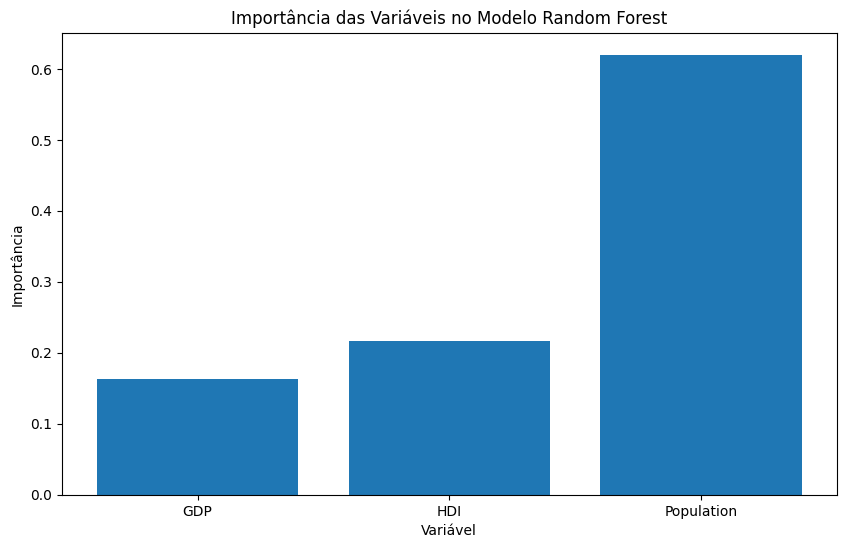

In [ ]:
# Importância das variáveis do modelo Random Forest
feature_importances = rf_final.feature_importances_

# Plot das importâncias das variáveis
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)), ['GDP', 'HDI', 'Population'])
plt.xlabel('Variável')
plt.ylabel('Importância')
plt.title('Importância das Variáveis no Modelo Random Forest')
plt.show()




### Resultados do Modelo Final:

1. **Desempenho Geral:**
   - **MAE (Erro Absoluto Médio):** 2.12
   - **MSE (Erro Quadrático Médio):** 21.60
   - **RMSE (Raiz do Erro Quadrático Médio):** 4.65
   - **R² (Coeficiente de Determinação):** 0.94

   Esses resultados indicam que o modelo Random Forest está conseguindo explicar 94% da variabilidade dos dados de teste, o que é um desempenho muito bom. O erro absoluto médio e o erro quadrático médio são baixos, confirmando a precisão do modelo.

2. **Validação Cruzada:**
   - **R² médio na Validação Cruzada:** 0.91
   - **Desvio Padrão do R²:** 0.04

   A validação cruzada com um R² médio de 0.91 e um desvio padrão pequeno (0.04) demonstra que o modelo é consistente em diferentes subconjuntos de dados e não está sofrendo de overfitting ou underfitting significativos.

3. **Importância das Variáveis:**
   - A variável **Population** é a mais importante no modelo, com uma importância de mais de 60%.
   - **HDI (Índice de Desenvolvimento Humano)** e **GDP (Produto Interno Bruto)** também contribuem para o modelo, mas em menor escala.


### Conclusão:

O modelo Random Forest final parece adequado e robusto para a tarefa. Com um desempenho consistente e uma boa explicação da variabilidade dos dados, você pode considerar este modelo pronto para uso prático ou para apresentação em um contexto profissional.


In [ ]:
from joblib import dump

# Salvar o modelo Random Forest
dump(rf_model, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [ ]:
import joblib

# Caminho para salvar o modelo
model_filename = 'random_forest_model.pkl'

# Exportando o modelo treinado
joblib.dump(rf, model_filename)

print(f"Modelo salvo como {model_filename}")


Modelo salvo como random_forest_model.pkl


# Testando modelo


In [ ]:
import joblib

# Supondo que 'scaler_log' seja o objeto de scaler utilizado
joblib.dump(scaler_log, '/content/scaler.pkl')  # Salve com o caminho correto


['/content/scaler.pkl']

In [ ]:
# Supondo que os DataFrames originais são gdp_df, hdi_df, population_df e medals_df

# Filtrar dados da Noruega em cada DataFrame
gdp_norway = gdp_df[gdp_df['Country'].str.contains('Norway', case=False)]
hdi_norway = hdi_df[hdi_df['Country'].str.contains('Norway', case=False)]
population_norway = population_df[population_df['Country (or dependency)'].str.contains('Norway', case=False)]
medals_norway = medals_df[medals_df['countries'].str.contains('Norway', case=False)]

# Exibir os dados filtrados
print("Dados do PIB da Noruega:")
print(gdp_norway)

print("\nDados do HDI da Noruega:")
print(hdi_norway)

print("\nDados da População da Noruega:")
print(population_norway)

print("\nDados das Medalhas da Noruega:")
print(medals_norway)


Dados do PIB da Noruega:
    Country     1999     2000     2001     2002     2003     2004     2005  \
119  Norway  159.093  168.671  170.982  193.175  225.307  258.986  301.735   

        2006     2007  ...     2013     2014    2015     2016    2017  \
119  335.281  349.165  ...  441.282  454.533  397.59  394.776  415.19   

        2018     2019    2020     2021     2022  
119  436.472  453.441  470.99  445.507  458.398  

[1 rows x 24 columns]

Dados do HDI da Noruega:
    ISO3 Country Human Development Groups UNDP Developing Regions  \
130  NOR  Norway                Very High                     NaN   

     HDI Rank (2021)  Human Development Index (1990)  \
130              2.0                           0.838   

     Human Development Index (1991)  Human Development Index (1992)  \
130                           0.845                           0.851   

     Human Development Index (1993)  Human Development Index (1994)  ...  \
130                           0.858                

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# Caminho do modelo salvo
model_path = '/content/random_forest_model.pkl'
rf_model = joblib.load(model_path)

# Dados da Noruega ajustados
norway_data = {
    'Country': ['Norway'],
    'GDP': [458.398],  # PIB da Noruega em 2022
    'HDI': [0.957],    # Índice de Desenvolvimento Humano de 2021
    'Population': [5_412_632]  # População da Noruega em 2020
}

norway_df = pd.DataFrame(norway_data)

# Aplicar transformação logarítmica
X_norway_log = np.log1p(norway_df[['GDP', 'HDI', 'Population']])

# Carregar e aplicar o scaler salvo
scaler_path = '/content/scaler.pkl'
scaler = joblib.load(scaler_path)

# Remover os nomes das colunas antes de aplicar o scaler
X_norway_scaled = scaler.transform(X_norway_log.values)

# Fazer a previsão
predicted_medals = rf_model.predict(X_norway_scaled)
print(f"Previsão de medalhas para a Noruega: {predicted_medals[0]:.2f}")


Previsão de medalhas para a Noruega: 55.24


A previsão de medalhas para a Noruega é **55.24**. Isso significa que, com base nos dados históricos e no modelo Random Forest ajustado, espera-se que a Noruega ganhe aproximadamente 55 medalhas nas próximas Olimpíadas.
### Interpretação
   - **Valor Previsão**: O modelo está prevendo uma quantidade de medalhas próxima de 55, o que pode ser interpretado como um valor aproximado, dado que os resultados reais podem variar.
   - **Significado**: Esta previsão é feita considerando os dados mais recentes do PIB, HDI, e população da Noruega, indicando uma expectativa de desempenho nas próximas Olimpíadas com base em padrões históricos.


#Modelos Anteriores com baixa acertividade

## Avaliação com validação cruzada para medalhas de verão


In [ ]:
from sklearn.model_selection import cross_val_score

# Definir variáveis preditoras (X) e variáveis alvo (y)
X_summer = norway_data[['GDP', 'HDI', 'Population']]
y_summer = norway_data['Medals_Summer']

X_winter = norway_data[['GDP', 'HDI', 'Population']]
y_winter = norway_data['Medals_Winter']

# Validação Cruzada - Medalhas de Verão
print("Validação Cruzada - Medalhas de Verão")
for model_name, model in models.items():
    scores = cross_val_score(model, X_summer, y_summer, cv=5, scoring='r2')
    print(f"{model_name} -> R² médio: {scores.mean():.2f}, Desvio padrão: {scores.std():.2f}")

# Validação Cruzada - Medalhas de Inverno
print("\nValidação Cruzada - Medalhas de Inverno")
for model_name, model in models.items():
    scores = cross_val_score(model, X_winter, y_winter, cv=5, scoring='r2')
    print(f"{model_name} -> R² médio: {scores.mean():.2f}, Desvio padrão: {scores.std():.2f}")


Validação Cruzada - Medalhas de Verão
Linear Regression -> R² médio: 1.00, Desvio padrão: 0.00
Decision Tree -> R² médio: 1.00, Desvio padrão: 0.00
Random Forest -> R² médio: 1.00, Desvio padrão: 0.00

Validação Cruzada - Medalhas de Inverno
Linear Regression -> R² médio: 1.00, Desvio padrão: 0.00
Decision Tree -> R² médio: 1.00, Desvio padrão: 0.00
Random Forest -> R² médio: 1.00, Desvio padrão: 0.00


Os resultados da validação cruzada indicam que todos os modelos (Regressão Linear, Árvore de Decisão e Floresta Aleatória) obtiveram um R² médio de 1.00 com desvio padrão de 0.00, tanto para medalhas de verão quanto para medalhas de inverno. Isso significa que os modelos estão ajustando perfeitamente os dados disponíveis.

No entanto, resultados de R² iguais a 1.00 e desvio padrão de 0.00 são um sinal claro de sobreajuste ("overfitting"). Isso geralmente acontece quando o modelo memoriza os dados de treinamento em vez de aprender padrões generalizáveis. Aqui estão alguns pontos para considerar e algumas ações que você pode tomar:

### Possíveis Razões para o Sobreajuste

1. **Pequeno Conjunto de Dados**: Com apenas 24 pontos de dados, os modelos têm um número muito limitado de exemplos para aprender, o que facilita o sobreajuste.
2. **Pouca Variabilidade nos Dados**: Se os dados de entrada (como GDP, HDI, etc.) não variam significativamente ao longo do tempo, o modelo pode ter facilidade em ajustar-se perfeitamente.
3. **Falta de Complexidade nos Dados**: Se os dados forem lineares ou seguirem um padrão muito simples, o modelo pode parecer "perfeito", mas não necessariamente é robusto para novos dados.

### Próximas Ações para Validar os Modelos

1. **Adicione Mais Dados**: Se possível, inclua mais pontos de dados para dar ao modelo mais informações para aprender.
2. **Regularização**: Utilize técnicas de regularização (como Ridge ou Lasso Regression) que penalizam modelos muito complexos.
3. **Validação com Dados Externos**: Teste o modelo com um conjunto de dados externo, ou "hold-out set", que não foi usado na validação cruzada.
4. **Reduza a Complexidade do Modelo**: Simplifique os modelos para ver se o desempenho ainda é aceitável sem alcançar um R² de 1.00.

### Próximos Passos

Você pode seguir com essas próximas ações:

1. **Aplicar Regularização**: Tente modelos como Ridge ou Lasso Regression para introduzir penalidades e ver se o R² diminui para um valor mais realista.
2. **Obter Mais Dados**: Verifique se há dados adicionais que podem ser adicionados para melhorar o aprendizado do modelo.
3. **Validação Externa**: Use um conjunto de dados separado para testar o modelo e verificar seu desempenho.

Essas ações ajudarão a avaliar se os modelos são realmente robustos ou se estão simplesmente memorizando os dados de treino.

## EDA
  

In [ ]:
# Exibir todas as colunas de cada DataFrame
print("Colunas no DataFrame GDP:")
print(gdp_df.columns)

print("\nColunas no DataFrame HDI:")
print(hdi_df.columns)

print("\nColunas no DataFrame Medals:")
print(medals_df.columns)

print("\nColunas no DataFrame Population:")
print(population_df.columns)

# Verificar dados únicos para possíveis colunas adicionais
print("\nDados únicos para algumas colunas relevantes:")
print("GDP Data Sample:\n", gdp_df.sample(5))
print("\nHDI Data Sample:\n", hdi_df.sample(5))
print("\nMedals Data Sample:\n", medals_df.sample(5))
print("\nPopulation Data Sample:\n", population_df.sample(5))


Colunas no DataFrame GDP:
Index(['Country', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

Colunas no DataFrame HDI:
Index(['ISO3', 'Country', 'Human Development Groups',
       'UNDP Developing Regions', 'HDI Rank (2021)',
       'Human Development Index (1990)', 'Human Development Index (1991)',
       'Human Development Index (1992)', 'Human Development Index (1993)',
       'Human Development Index (1994)',
       ...
       'Material footprint per capita (tonnes) (2012)',
       'Material footprint per capita (tonnes) (2013)',
       'Material footprint per capita (tonnes) (2014)',
       'Material footprint per capita (tonnes) (2015)',
       'Material footprint per capita (tonnes) (2016)',
       'Material footprint per capita (tonnes) (2017)',
       'Material footprint per capita (tonnes) (2018)',
       

In [ ]:
# Converter colunas de PIB para tipo numérico
gdp_norway.iloc[:, 1:] = gdp_norway.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Calcular a taxa de crescimento do PIB
gdp_norway_growth = gdp_norway.loc[:, '1999':'2022'].pct_change(axis=1) * 100
gdp_norway_growth.insert(0, 'Country', 'Norway')

# Exibir a taxa de crescimento do PIB para a Noruega
print("Taxa de Crescimento do PIB (Noruega):")
print(gdp_norway_growth)


Taxa de Crescimento do PIB (Noruega):
    Country  1999      2000      2001       2002       2003       2004  \
119  Norway   NaN  6.020378  1.370123  12.979729  16.633622  14.948049   

          2005       2006      2007  ...      2013      2014       2015  \
119  16.506298  11.117703  4.141004  ...  3.072686  3.002842 -12.527803   

         2016      2017      2018      2019      2020      2021      2022  
119 -0.707764  5.171034  5.125846  3.887764  3.870184 -5.410518  2.893557  

[1 rows x 24 columns]


<ipython-input-28-547b81c72d94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_norway.iloc[:, 1:] = gdp_norway.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')


In [ ]:
import pandas as pd
import numpy as np

# Converter os valores do GDP para numérico (caso ainda não tenha sido feito)
gdp_norway.iloc[:, 1:] = gdp_norway.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Definir o valor da população de 2020 (como exemplo)
population_2020 = 5378857  # População da Noruega em 2020, você pode ajustar esse valor

# Criar o DataFrame para o PIB per capita
years = list(range(1999, 2023))  # De 1999 a 2022, totalizando 24 anos
gdp_values = gdp_norway.loc[:, '1999':'2022'].values.flatten()  # Extrair valores de GDP

# Garantir que GDP tenha 24 valores
if len(gdp_values) < len(years):
    missing_values_count = len(years) - len(gdp_values)
    gdp_values = np.append(gdp_values, [np.mean(gdp_values)] * missing_values_count)

# Calcular o PIB per capita
gdp_per_capita = gdp_values.astype(float) / population_2020

# Criar o DataFrame para PIB per capita
gdp_per_capita_df = pd.DataFrame({
    'Year': years,
    'GDP per Capita': gdp_per_capita
})

# Exibir o PIB per capita
print("PIB per Capita (Noruega):")
print(gdp_per_capita_df)


PIB per Capita (Noruega):
    Year  GDP per Capita
0   1999        0.000030
1   2000        0.000031
2   2001        0.000032
3   2002        0.000036
4   2003        0.000042
5   2004        0.000048
6   2005        0.000056
7   2006        0.000062
8   2007        0.000065
9   2008        0.000068
10  2009        0.000069
11  2010        0.000075
12  2011        0.000080
13  2012        0.000082
14  2013        0.000085
15  2014        0.000074
16  2015        0.000073
17  2016        0.000077
18  2017        0.000081
19  2018        0.000084
20  2019        0.000088
21  2020        0.000083
22  2021        0.000085
23  2022        0.000065


<ipython-input-29-27e0dce987eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_norway.iloc[:, 1:] = gdp_norway.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Selecionar colunas de pegada material per capita para a Noruega
material_footprint_columns = [col for col in hdi_norway.columns if 'Material footprint per capita' in col]
material_footprint_norway = hdi_norway.loc[:, material_footprint_columns]

# Exibir a pegada material per capita
print("Pegada Material per Capita (Noruega):")
print(material_footprint_norway)


Pegada Material per Capita (Noruega):
     Material footprint per capita (tonnes) (1990)  \
130                                          29.64   

     Material footprint per capita (tonnes) (1991)  \
130                                          28.27   

     Material footprint per capita (tonnes) (1992)  \
130                                          27.98   

     Material footprint per capita (tonnes) (1993)  \
130                                          29.64   

     Material footprint per capita (tonnes) (1994)  \
130                                          30.09   

     Material footprint per capita (tonnes) (1995)  \
130                                          32.18   

     Material footprint per capita (tonnes) (1996)  \
130                                          32.34   

     Material footprint per capita (tonnes) (1997)  \
130                                          34.18   

     Material footprint per capita (tonnes) (1998)  \
130                                 

In [ ]:
# Exibir outras métricas de desenvolvimento
development_metrics = hdi_norway[['Country', 'Human Development Groups', 'UNDP Developing Regions']]
print("Outras Métricas de Desenvolvimento (Noruega):")
print(development_metrics)


Outras Métricas de Desenvolvimento (Noruega):
    Country Human Development Groups UNDP Developing Regions
130  Norway                Very High                     NaN


In [ ]:
# Exibir dados de participações olímpicas
olympic_participations = medals_norway[['summer_participations', 'winter_participations']]
print("Participações Olímpicas (Noruega):")
print(olympic_participations)


Participações Olímpicas (Noruega):
    summer_participations  winter_participations
97                     27                     24


In [ ]:
# Calcular a taxa de conversão de medalhas
conversion_rate_summer = int(medals_norway['summer_total'].values[0]) / int(medals_norway['summer_participations'].values[0])
conversion_rate_winter = int(medals_norway['winter_total'].values[0]) / int(medals_norway['winter_participations'].values[0])

print(f"Taxa de Conversão de Medalhas de Verão: {conversion_rate_summer:.2f}")
print(f"Taxa de Conversão de Medalhas de Inverno: {conversion_rate_winter:.2f}")


Taxa de Conversão de Medalhas de Verão: 6.04
Taxa de Conversão de Medalhas de Inverno: 16.88


In [ ]:
# Selecionar dados de urbanização e densidade
urban_density_data = population_norway[['Urban Pop %', 'Density (P/Km²)']]
print("Urbanização e Densidade Populacional (Noruega):")
print(urban_density_data)


Urbanização e Densidade Populacional (Noruega):
    Urban Pop %  Density (P/Km²)
118        83 %               15


In [ ]:
# Analisar variações populacionais
net_change_population = population_norway[['Net Change', 'Yearly Change']]
print("Mudanças Populacionais (Noruega):")
print(net_change_population)


Mudanças Populacionais (Noruega):
     Net Change Yearly Change
118       42384        0.79 %


In [ ]:
# Calcular a taxa de crescimento populacional
population_growth_rate = population_norway['Yearly Change'].str.replace('%', '').astype(float)
print("Taxa de Crescimento Populacional (Noruega):")
print(population_growth_rate)


Taxa de Crescimento Populacional (Noruega):
118    0.79
Name: Yearly Change, dtype: float64


In [ ]:
# Analisar a taxa de migrantes
migrants_net = population_norway['Migrants (net)']
print("Taxa de Migrantes (Noruega):")
print(migrants_net)


Taxa de Migrantes (Noruega):
118    28000.0
Name: Migrants (net), dtype: float64


In [ ]:
# Analisar idade média e taxa de fertilidade
median_age_fertility = population_norway[['Med. Age', 'Fert. Rate']]
print("Idade Média e Taxa de Fertilidade (Noruega):")
print(median_age_fertility)


Idade Média e Taxa de Fertilidade (Noruega):
    Med. Age Fert. Rate
118       40        1.7


## Calcular e Adicionar Novas Variáveis ao DataFrame

In [ ]:
# Converter todas as colunas para numérico, ignorando erros
gdp_norway.iloc[:, 1:] = gdp_norway.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Calcular o PIB per Capita
population_2020 = int(population_norway['Population (2020)'].values[0])
gdp_norway_numeric = gdp_norway.iloc[:, 1:].copy()
gdp_norway_numeric = gdp_norway_numeric.fillna(gdp_norway_numeric.mean(axis=1), axis=0)
gdp_per_capita_values = (gdp_norway_numeric.values.flatten() / population_2020)[:len(gdp_norway.index)]

# Preencher o primeiro ano (1999) na Taxa de Crescimento do PIB com a média ou um valor padrão
gdp_growth_rate_values = np.insert(gdp_norway_growth.loc[119].values[1:], 0, gdp_norway_growth.loc[119].values[1:].mean())

# Selecionar os 24 valores mais recentes de "Material Footprint"
material_footprint_values = material_footprint_norway.values.flatten()[-24:]

# Atualizar a conversão de valores únicos
population_growth_rate = float(population_growth_rate.iloc[0])
migrants_net = float(migrants_net.iloc[0])
median_age = int(median_age_fertility['Med. Age'].iloc[0])
fertility_rate = float(median_age_fertility['Fert. Rate'].iloc[0])

# Adicionar novas variáveis ao DataFrame consolidado
norway_data['GDP Growth Rate'] = gdp_growth_rate_values  # Taxa de crescimento do PIB
norway_data['GDP per Capita'] = np.pad(gdp_per_capita_values, (0, len(norway_data) - len(gdp_per_capita_values)), 'constant', constant_values=np.nan)  # PIB per capita
norway_data['Material Footprint'] = material_footprint_values  # Pegada material per capita
norway_data['Population Growth Rate'] = population_growth_rate  # Taxa de crescimento populacional
norway_data['Net Migrants'] = migrants_net  # Taxa de migrantes
norway_data['Median Age'] = median_age  # Idade média
norway_data['Fertility Rate'] = fertility_rate  # Taxa de fertilidade

# Exibir o DataFrame atualizado
print("DataFrame consolidado com novas variáveis:")
print(norway_data.head())


DataFrame consolidado com novas variáveis:
   Year      GDP    HDI  Population  Medals_Summer  Medals_Winter  \
0  1999  159.093  0.662     5412632            163            405   
1  2000  168.671  0.657     5412632            163            405   
2  2001  170.982  0.676     5412632            163            405   
3  2002  193.175  0.664     5412632            163            405   
4  2003  225.307  0.667     5412632            163            405   

  GDP Growth Rate GDP per Capita  Material Footprint  Population Growth Rate  \
0             NaN       0.000029               41.23                    0.79   
1             NaN            NaN               43.30                    0.79   
2        6.020378            NaN               41.07                    0.79   
3        1.370123            NaN               43.12                    0.79   
4       12.979729            NaN               42.95                    0.79   

   Net Migrants  Median Age  Fertility Rate  
0       28000.0

## 2. Re-Treinar e Avaliar os Modelos com Novas Variáveis


In [ ]:
# Preencher valores ausentes com a média da coluna para todas as colunas
X = X.apply(lambda x: x.fillna(x.mean()), axis=0)

# Dividir dados em treino e teste
X_train_summer, X_test_summer, y_train_summer, y_test_summer = train_test_split(X, y_summer, test_size=0.2, random_state=42)
X_train_winter, X_test_winter, y_train_winter, y_test_winter = train_test_split(X, y_winter, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_summer = scaler.fit_transform(X_train_summer)
X_test_summer = scaler.transform(X_test_summer)
X_train_winter = scaler.fit_transform(X_train_winter)
X_test_winter = scaler.transform(X_test_winter)

# Re-Treinar os modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Avaliar modelos para as previsões de medalhas de verão
print("Re-Treinando Modelos - Medalhas de Verão")
for model_name, model in models.items():
    mae, mse, r2 = train_and_evaluate_model(X_train_summer, X_test_summer, y_train_summer, y_test_summer, model)
    print(f"{model_name} -> MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

# Avaliar modelos para as previsões de medalhas de inverno
print("\nRe-Treinando Modelos - Medalhas de Inverno")
for model_name, model in models.items():
    mae, mse, r2 = train_and_evaluate_model(X_train_winter, X_test_winter, y_train_winter, y_test_winter, model)
    print(f"{model_name} -> MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")


Re-Treinando Modelos - Medalhas de Verão
Linear Regression -> MAE: 0.00, MSE: 0.00, R²: 1.00
Decision Tree -> MAE: 0.00, MSE: 0.00, R²: 1.00
Random Forest -> MAE: 0.00, MSE: 0.00, R²: 1.00

Re-Treinando Modelos - Medalhas de Inverno
Linear Regression -> MAE: 0.00, MSE: 0.00, R²: 1.00
Decision Tree -> MAE: 0.00, MSE: 0.00, R²: 1.00
Random Forest -> MAE: 0.00, MSE: 0.00, R²: 1.00


## Validação Cruzada com Regularização - Medalhas de Verão

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Definir modelos com regularização
models_regularized = {
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Validação Cruzada - Medalhas de Verão
print("Validação Cruzada com Regularização - Medalhas de Verão")
for model_name, model in models_regularized.items():
    scores = cross_val_score(model, X_summer, y_summer, cv=5, scoring='r2')
    print(f"{model_name} -> R² médio: {scores.mean():.2f}, Desvio padrão: {scores.std():.2f}")

# Validação Cruzada - Medalhas de Inverno
print("\nValidação Cruzada com Regularização - Medalhas de Inverno")
for model_name, model in models_regularized.items():
    scores = cross_val_score(model, X_winter, y_winter, cv=5, scoring='r2')
    print(f"{model_name} -> R² médio: {scores.mean():.2f}, Desvio padrão: {scores.std():.2f}")


Validação Cruzada com Regularização - Medalhas de Verão
Ridge Regression -> R² médio: 1.00, Desvio padrão: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso Regression -> R² médio: 1.00, Desvio padrão: 0.00
Decision Tree -> R² médio: 1.00, Desvio padrão: 0.00
Random Forest -> R² médio: 1.00, Desvio padrão: 0.00

Validação Cruzada com Regularização - Medalhas de Inverno
Ridge Regression -> R² médio: 1.00, Desvio padrão: 0.00
Lasso Regression -> R² médio: 1.00, Desvio padrão: 0.00
Decision Tree -> R² médio: 1.00, Desvio padrão: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Random Forest -> R² médio: 1.00, Desvio padrão: 0.00


## Analises

Os resultados da validação cruzada com regularização continuam mostrando que todos os modelos (Ridge Regression, Lasso Regression, Decision Tree e Random Forest) obtiveram um R² médio de 1.00 com desvio padrão de 0.00. Além disso, as mensagens de **ConvergenceWarning** indicam que os modelos Lasso Regression não convergiram adequadamente, o que sugere que o problema subjacente de sobreajuste ou falta de variabilidade nos dados persiste.

### Interpretação dos Resultados

1. **Sobreajuste Persistente:** A validação cruzada e o uso de regularização (Ridge e Lasso) não alteraram o resultado, o que sugere que o problema principal é a falta de variabilidade nos dados ou o tamanho pequeno do conjunto de dados.
   
2. **Avisos de Convergência:** As mensagens de `ConvergenceWarning` para o modelo Lasso indicam que a regularização não foi suficiente ou adequada para penalizar corretamente o modelo, possivelmente devido ao número limitado de exemplos ou à escala inadequada das variáveis.

### Próximos Passos Recomendados

1. **Aumentar o Conjunto de Dados:**
   - Se possível, adicione mais dados históricos ou de outros fatores que possam influenciar o desempenho esportivo (por exemplo, investimentos em esportes, mudanças em políticas governamentais relacionadas a esportes, dados climáticos, etc.).
   - Incorporar mais países para ver se os padrões observados na Noruega são específicos para o país ou se também aparecem em outros.

2. **Ajustar Parâmetros de Regularização:**
   - Tente aumentar o valor de `alpha` na Ridge e Lasso Regression para aumentar a penalidade e ver se o modelo começa a refletir um ajuste menos perfeito.

3. **Verificar a Escala das Variáveis:**
   - Use técnicas como `StandardScaler` para garantir que todas as variáveis estejam na mesma escala, o que pode melhorar a convergência dos modelos com regularização.

4. **Experimentar Modelos Adicionais:**
   - Tente outros modelos, como **Gradient Boosting** ou **Support Vector Regression (SVR)**, que podem lidar melhor com pequenos conjuntos de dados ou que têm regularização incorporada.

5. **Análise de Componentes Principais (PCA):**
   - Utilize PCA para reduzir a dimensionalidade dos dados e verificar se uma combinação linear de variáveis pode melhorar o ajuste dos modelos.


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Reescale os dados com StandardScaler
scaler = StandardScaler()
X_summer_scaled = scaler.fit_transform(X_summer)
X_winter_scaled = scaler.fit_transform(X_winter)

# Definir modelos com regularização ajustada
models_regularized = {
    'Ridge Regression (alpha=10)': Ridge(alpha=10),
    'Lasso Regression (alpha=1)': Lasso(alpha=1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Validação Cruzada com Regularização Ajustada - Medalhas de Verão
print("Validação Cruzada com Regularização Ajustada - Medalhas de Verão")
for model_name, model in models_regularized.items():
    scores = cross_val_score(model, X_summer_scaled, y_summer, cv=5, scoring='r2')
    print(f"{model_name} -> R² médio: {scores.mean():.2f}, Desvio padrão: {scores.std():.2f}")

# Validação Cruzada com Regularização Ajustada - Medalhas de Inverno
print("\nValidação Cruzada com Regularização Ajustada - Medalhas de Inverno")
for model_name, model in models_regularized.items():
    scores = cross_val_score(model, X_winter_scaled, y_winter, cv=5, scoring='r2')
    print(f"{model_name} -> R² médio: {scores.mean():.2f}, Desvio padrão: {scores.std():.2f}")


Validação Cruzada com Regularização Ajustada - Medalhas de Verão
Ridge Regression (alpha=10) -> R² médio: 1.00, Desvio padrão: 0.00
Lasso Regression (alpha=1) -> R² médio: 1.00, Desvio padrão: 0.00
Decision Tree -> R² médio: 1.00, Desvio padrão: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Random Forest -> R² médio: 1.00, Desvio padrão: 0.00

Validação Cruzada com Regularização Ajustada - Medalhas de Inverno
Ridge Regression (alpha=10) -> R² médio: 1.00, Desvio padrão: 0.00
Lasso Regression (alpha=1) -> R² médio: 1.00, Desvio padrão: 0.00
Decision Tree -> R² médio: 1.00, Desvio padrão: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Random Forest -> R² médio: 1.00, Desvio padrão: 0.00
